In [2]:
import pandas as pd
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB


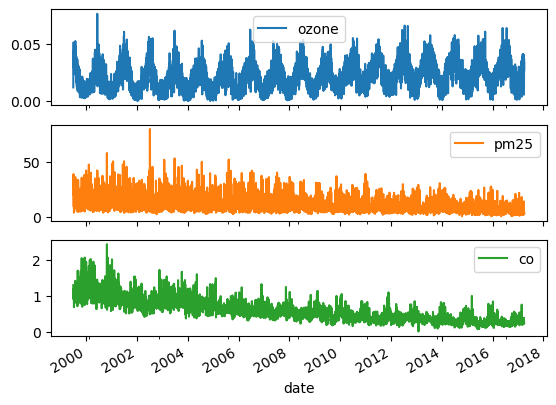

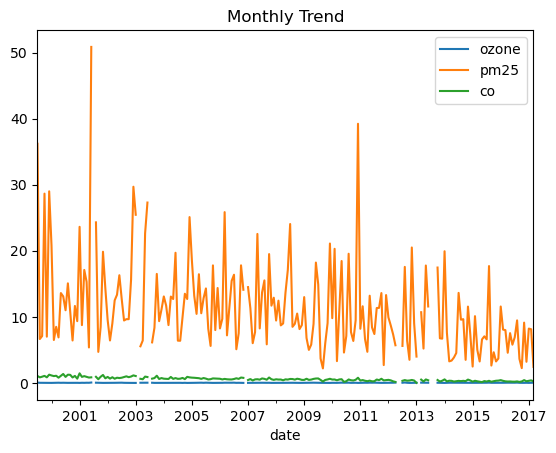

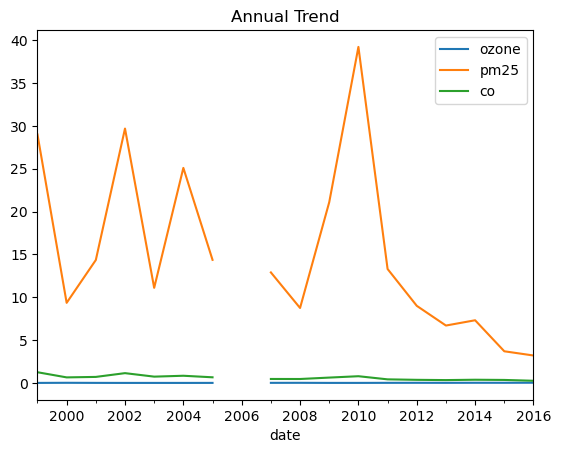

In [3]:
aqdata = pd.read_csv('datasets/signal_and_image_analysis/nyc.csv')
aqdata['date'] = pd.to_datetime(aqdata['date'])
aqdata.set_index('date', inplace=True)

aqdata.info()
aqdata.plot(subplots=True)

# monthly
aqdata.asfreq('M').plot(title='Monthly Trend')

# annual
aqdata.asfreq('A').plot(title='Annual Trend')
plt.show()

            price  lagged  shifted  shifted_30  change_30  diff_30
date                                                              
2015-12-18  32.95   36.24      NaN       34.20      -1.25    -1.25
2015-12-21  32.96   36.10      NaN       33.68      -0.72    -0.72
2015-12-22  34.19   35.69      NaN       33.99       0.20     0.20
2015-12-23  34.45   35.19      NaN       33.38       1.07     1.07
2015-12-24  34.11   34.10      NaN       33.23       0.88     0.88
2015-12-25    NaN   32.93      NaN       32.19        NaN      NaN
2015-12-28  33.60   31.31      NaN       32.94       0.66     0.66
2015-12-29  34.04   31.74      NaN       32.86       1.18     1.18
2015-12-30  33.37   32.52      NaN       32.98       0.39     0.39
2015-12-31  33.26   33.69      NaN       32.62       0.64     0.64
0.0    703
Name: count, dtype: int64
            price  lagged  shifted  shifted_30  change_30  diff_30  \
date                                                                 
2013-01-02  20.08  

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

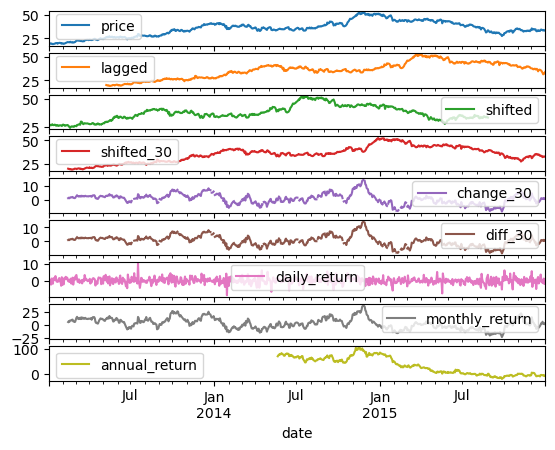

In [4]:
yahooStock = pd.read_csv('datasets/signal_and_image_analysis/yahoo.csv', parse_dates=['date'], index_col='date')
yahooStock = yahooStock.asfreq('B')

# 90 days shift
yahooStock['lagged'] = yahooStock['price'].shift(periods=90)
yahooStock['shifted'] = yahooStock['price'].shift(periods=-90)

# 30-business days shift into the future
yahooStock['shifted_30'] = yahooStock['price'].shift(periods=30)
yahooStock['change_30'] = yahooStock['price'] - yahooStock['shifted_30']
yahooStock['diff_30'] = yahooStock['price'].diff(periods=30)

# last 10 rows of yahoo df
print(yahooStock.tail(10))

# second way
print(yahooStock['change_30'].sub(yahooStock['diff_30']).value_counts())

# daily_return, monthly_return, annual_return
yahooStock['daily_return'] = yahooStock['price'].pct_change(1).mul(100)
yahooStock['monthly_return'] = yahooStock['price'].pct_change(30).mul(100)
yahooStock['annual_return'] = yahooStock['price'].pct_change(360).mul(100)

# print df
print(yahooStock)

# plot
yahooStock.plot(subplots=True)


Text(0, 0.5, 'Normalized Price')

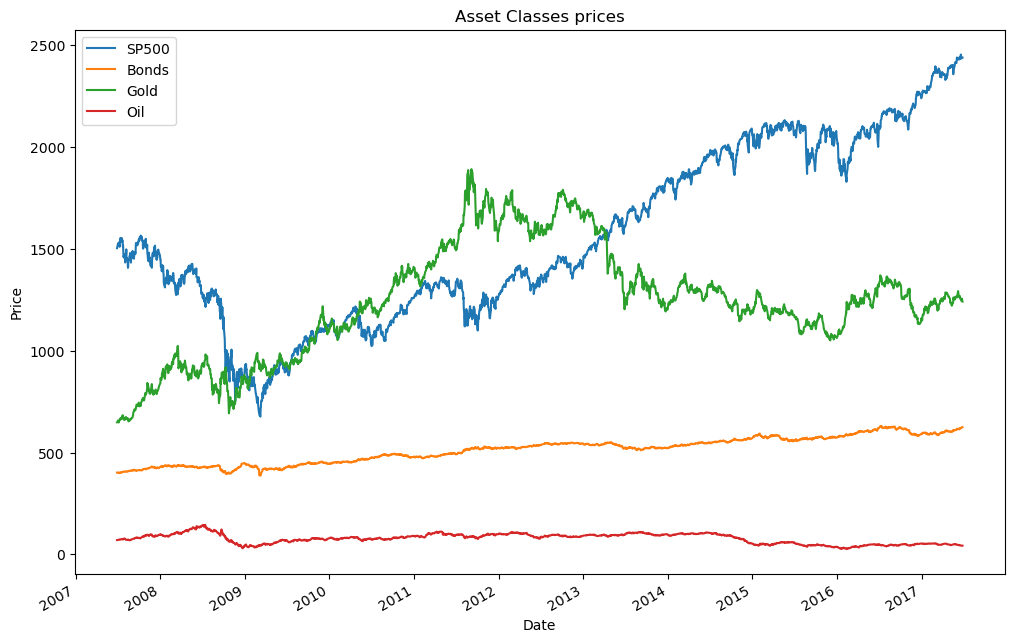

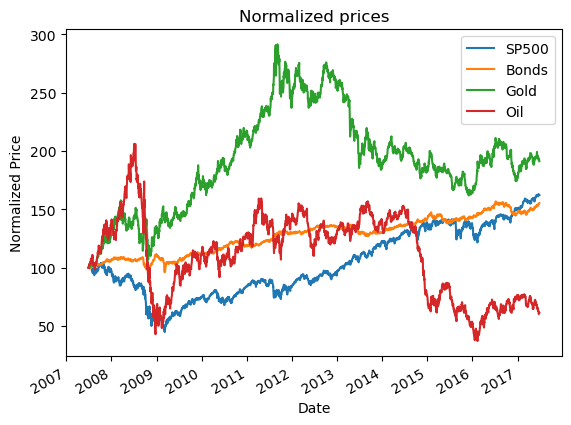

In [5]:
prices = pd.read_csv('datasets/signal_and_image_analysis/asset_classes.csv', parse_dates=['DATE'], index_col='DATE')

prices.plot(figsize=(12, 8), title='Asset Classes prices')
plt.xlabel('Date')
plt.ylabel('Price')


# first price for each series
first_prices = prices.iloc[0]

# normalized_prices
normalized_prices = (prices / first_prices) * 100

# plot normalized_prices
normalized_prices.plot(title='Normalized prices')
plt.xlabel('Date')
plt.ylabel('Normalized Price')


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2007-01-31 to 2016-12-31
Freq: M
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  0 non-null      float64
dtypes: float64(1)
memory usage: 1.9 KB
None


Text(0, 0.5, 'Rate')

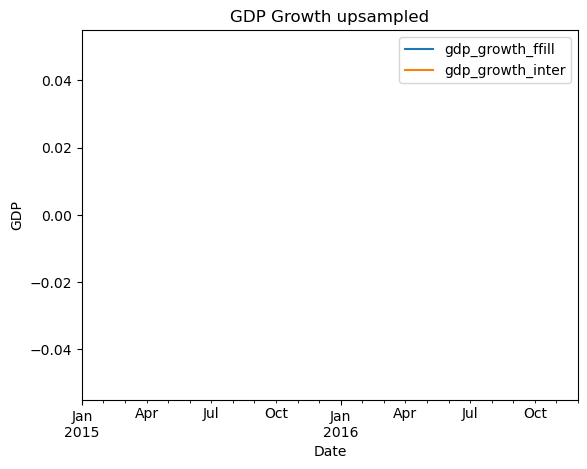

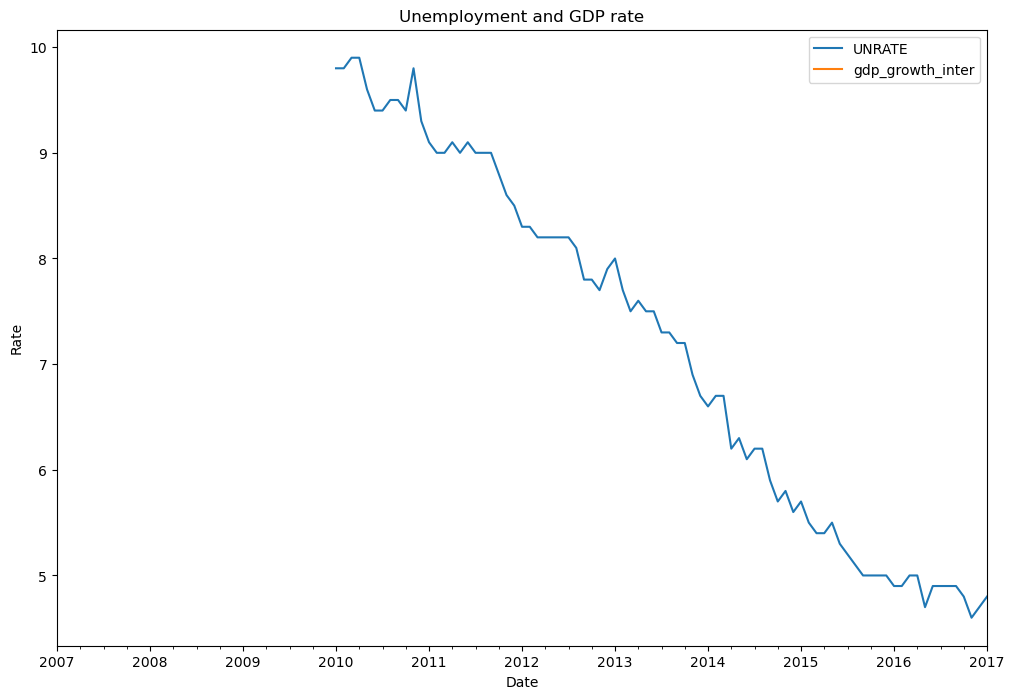

In [7]:
gdp = pd.read_csv('datasets/signal_and_image_analysis/gdp_growth.csv', parse_dates=['date'], index_col='date')

print(gdp.info())

# set monthly freq
gdp = gdp.asfreq('M')

# frequency column after setting monthly freq
print(gdp.info())

# resample
gdp_1 = gdp.resample('MS').ffill().add_suffix('_ffill')

# interpolate and resample
gdp_2 = gdp.resample('MS').interpolate().add_suffix('_inter')

gdp_combined = pd.concat([gdp_1, gdp_2], axis=1).loc['2015':]
gdp_combined.plot(title='GDP Growth upsampled')
plt.xlabel('Date')
plt.ylabel('GDP')


# unemployment rates in unrate
unrate = pd.read_csv('datasets/signal_and_image_analysis/unrate.csv', parse_dates=['DATE'], index_col='DATE')

# combined plot of unemployment and GDP growth
combined_df = pd.concat([unrate, gdp_2], axis=1)
combined_df.plot(figsize=(12, 8), title='Unemployment and GDP rate')
plt.xlabel('Date')
plt.ylabel('Rate')



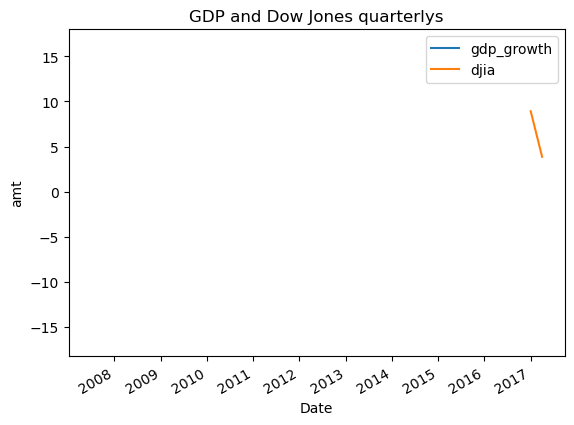

In [8]:
# Dow Jones data, daily frequency
djia = pd.read_csv('datasets/signal_and_image_analysis/djia.csv', parse_dates=['date'], index_col='date')

# Resample djia using frequency alias 'QS', aggregate using .first() and assign it to djia_quarterly.
djia_quarterly = djia.resample('QS').first()

# Apply .pct_change() and .mul(100) to obtain djia_quarterly_return
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Apply .pct_change() to djia_quarterly and .mul() by 100 to obtain djia_quarterly_return. 
data = pd.concat([gdp, djia_quarterly_return], axis=1)

# Plot the results
data.plot(title='GDP and Dow Jones quarterlys')
plt.xlabel('Date')
plt.ylabel('amt')
plt.show()


Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64


<Figure size 640x480 with 0 Axes>

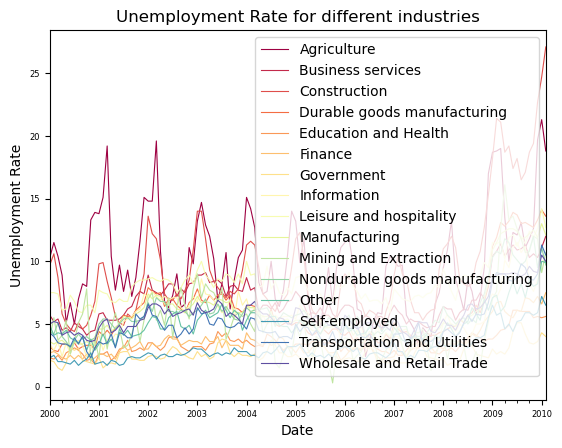

<Figure size 640x480 with 0 Axes>

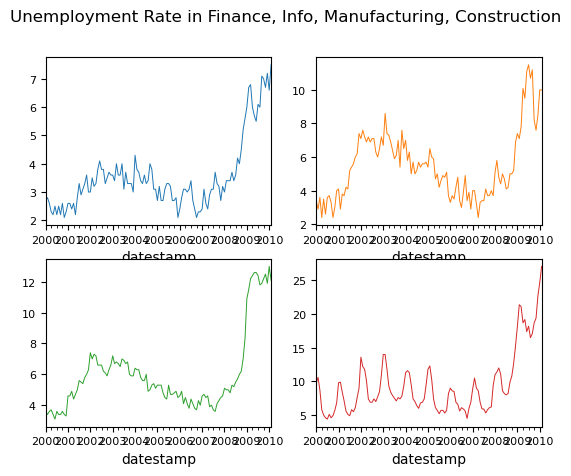

In [9]:
import seaborn as sns

jobs = pd.read_csv('datasets/signal_and_image_analysis/employment.csv')
jobs['datestamp'] = pd.to_datetime(jobs['datestamp'])
jobs.set_index('datestamp', inplace=True)

# print num missing vals
print(jobs.isnull().sum())

# spectral palette
plt.figure()
ax = jobs.plot(colormap='Spectral', fontsize=6, linewidth=0.8)
plt.title('Unemployment Rate for different industries')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.show()

# 4 inducstries
industries = ['Finance', 'Information', 'Manufacturing', 'Construction']
jobs_subset = jobs[industries]

# Step 7: Faceted plot of the jobs_subset DataFrame
plt.figure()
ax = jobs_subset.plot(subplots=True, layout=(2, 2), sharex=False, sharey=False, linewidth=0.7, fontsize=8, legend=False)
plt.suptitle('Unemployment Rate in Finance, Info, Manufacturing, Construction')
plt.show()


<Figure size 1200x800 with 0 Axes>

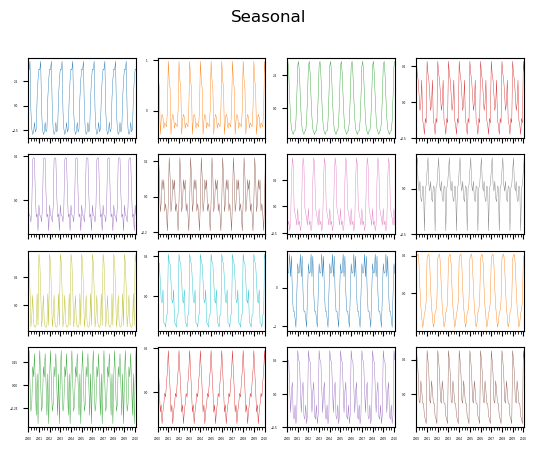

<Figure size 1200x800 with 0 Axes>

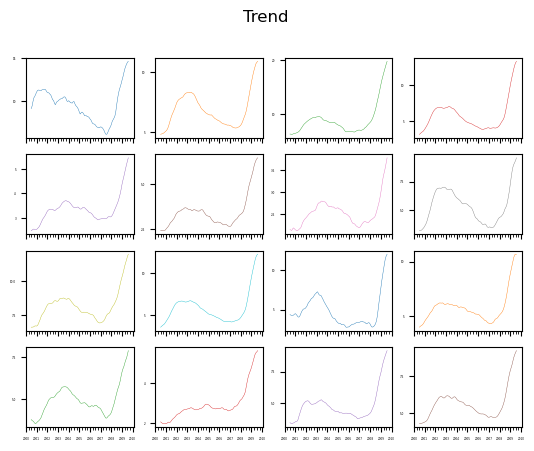

<Figure size 1200x800 with 0 Axes>

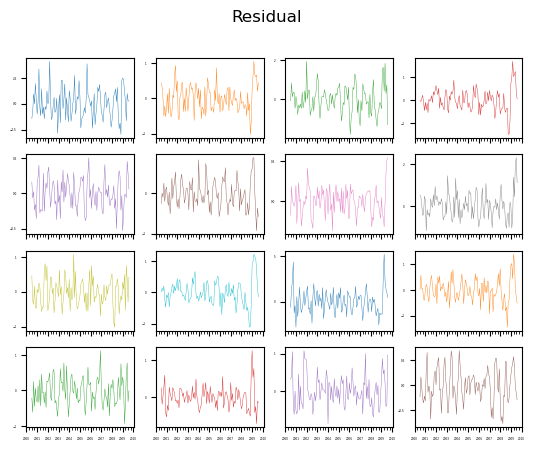

In [10]:
import statsmodels.api as sm

jobs_decompose = {}
jobs_industries = jobs.columns

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_industries:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    jobs_decompose[ts] = ts_decomposition

# Extract the seasonal values for the decomposition of each time series
jobs_seasonal = pd.DataFrame(index=jobs.index)
for ts in jobs_industries:
    jobs_seasonal[ts] = jobs_decompose[ts].seasonal

# Create a DataFrame from the jobs_seasonal dictionary
seasonality_df = pd.DataFrame(jobs_seasonal)

# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
plt.figure(figsize=(12, 8))
seasonality_df.plot(subplots=True, layout=(4, 4), sharey=False, fontsize=2, linewidth=0.3, legend=False)
plt.suptitle('Seasonal')
plt.show()

# trend
jobs_trend = pd.DataFrame(index=jobs.index)
for ts in jobs_industries:
    jobs_trend[ts] = jobs_decompose[ts].trend

trend_df = pd.DataFrame(jobs_trend)
trend_df.index.name = None

plt.figure(figsize=(12, 8))
trend_df.plot(subplots=True, layout=(4, 4), sharey=False, fontsize=2, linewidth=0.3, legend=False)
plt.suptitle('Trend')
plt.show()

# residual
jobs_resid = pd.DataFrame(index=jobs.index)
for ts in jobs_industries:
    jobs_resid[ts] = jobs_decompose[ts].resid

resid_df = pd.DataFrame(jobs_resid)
resid_df.index.name = None

plt.figure(figsize=(12, 8))
resid_df.plot(subplots=True, layout=(4, 4), sharey=False, fontsize=2, linewidth=0.3, legend=False)
plt.suptitle('Residual')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

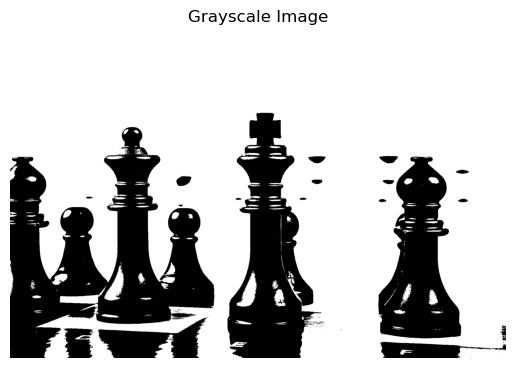

In [11]:
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
from skimage import io

image = io.imread('datasets/signal_and_image_analysis/bw.jpg')
chess_pieces_image_gray = rgb2gray(image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image

plt.imshow(binary, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show


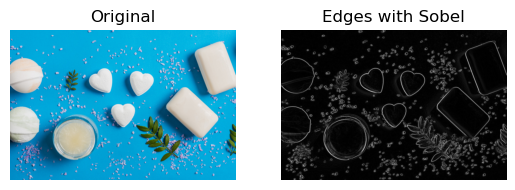

In [12]:
# Import the color module
from skimage import color
# Import the filters module and sobel function
from skimage.filters import sobel

# Read the image and make the image grayscale
soaps_image = io.imread('datasets/signal_and_image_analysis/soaps.jpg')
soaps_image_gray = color.rgb2gray(soaps_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

# Show original and resulting image to compare
fig, axs = plt.subplots(1, 2)

axs[0].imshow(soaps_image) 
axs[0].set_title("Original") 
axs[0].axis('off')

axs[1].imshow(edge_sobel, cmap='gray') 
axs[1].set_title("Edges with Sobel")
axs[1].axis('off')

plt.show()

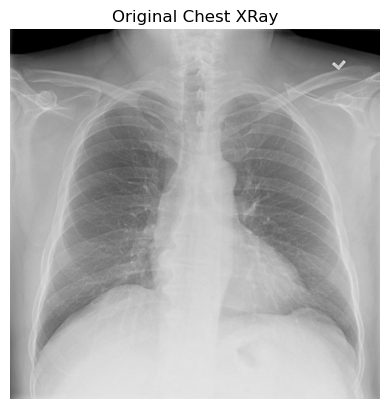

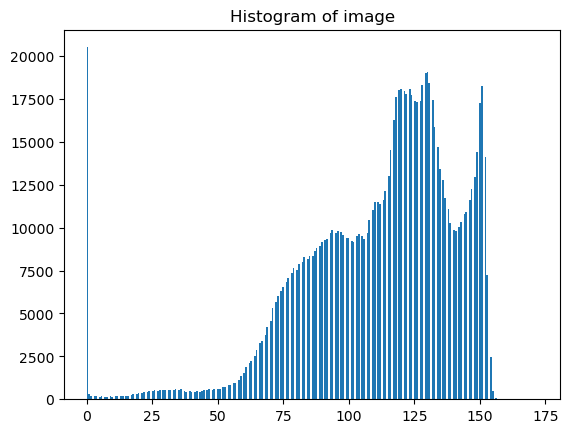

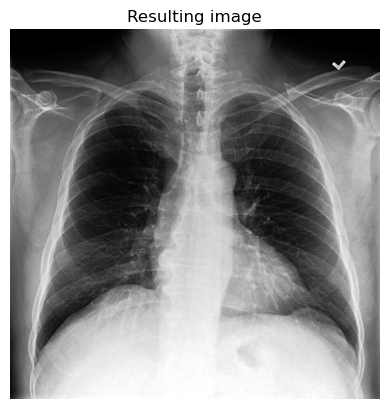

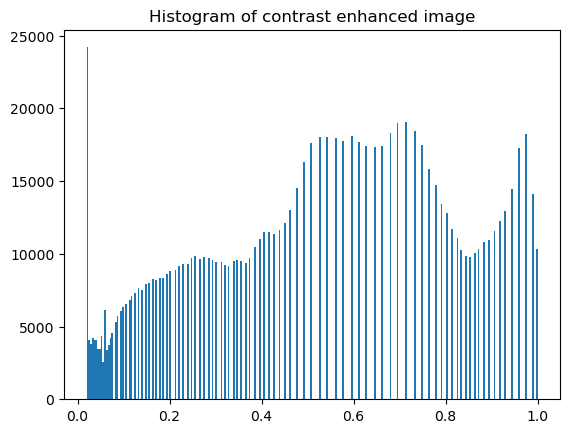

In [13]:
#import the required module
from skimage import exposure

# Show original x-ray image and its histogram
chest_xray_image = io.imread('datasets/signal_and_image_analysis/chest_xray.png')
plt.imshow(chest_xray_image, cmap='gray')
plt.title('Original Chest XRay')
plt.axis('off')
plt.show()

plt.title('Histogram of image')
plt.hist (chest_xray_image.ravel(), bins=256)
plt.show()

# Use histogram equalization to improve the contrast
xray_image_eq = exposure.equalize_hist(chest_xray_image)

# Show the resulting image and the corresponding histogram
plt.title('Resulting image') 
plt.imshow(xray_image_eq, cmap='gray')
plt.axis('off')
plt.show()
plt.title('Histogram of contrast enhanced image')
plt.hist(xray_image_eq.ravel(), bins=256)
plt.show()

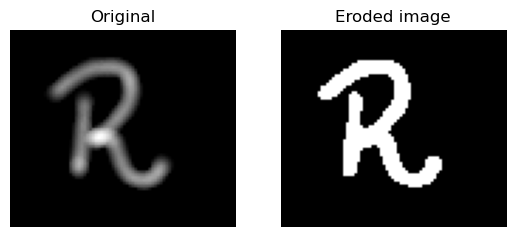

In [14]:
# Import the morphology module
from skimage import morphology


# Obtain the eroded shape
upper_r_image = io.imread('datasets/signal_and_image_analysis/r5-1.png', as_gray=True)
upper_r_image_grayscale = upper_r_image
eroded_image_shape = morphology.binary_erosion(upper_r_image_grayscale)

fig, axs = plt.subplots(1, 2)

# See results
axs[0].imshow(upper_r_image, cmap='gray')
axs[0].set_title("Original") 
axs[0].axis('off')

# See results of Eroded Image
axs[1].imshow(eroded_image_shape, cmap='gray') 
axs[1].set_title("Eroded image")
axs[1].axis('off')

plt.show()

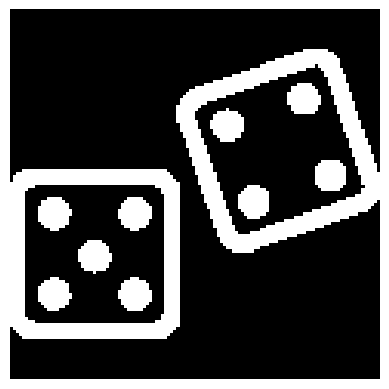

In [15]:
from skimage import measure, filters

# Make the image grayscale
image_dice = io.imread('datasets/signal_and_image_analysis/dices.png')
image_dice = color.rgb2gray(image_dice[:,:,:3])
# Obtain the optimal thresh value
thresh = filters.threshold_otsu(image_dice)

# Apply thresholding
binary = image_dice > thresh

plt.imshow(binary, cmap='gray')
plt.axis('off')
plt.show()

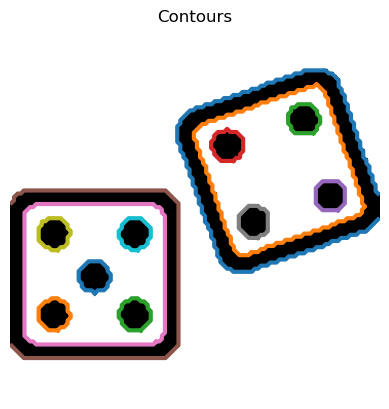

In [15]:
contours = measure.find_contours(binary, 0.8)

def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')
    
show_image_contour(binary, contours)

Dice's dots number: 9. 


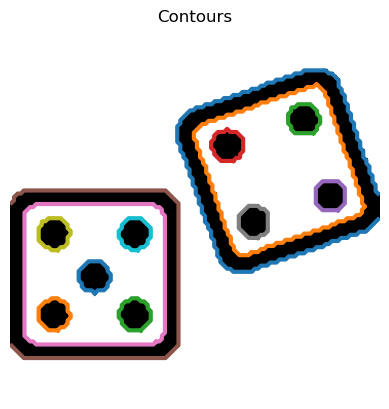

In [16]:
import numpy as np

# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found 
show_image_contour(binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))

In [16]:
# Import imageio module
import imageio
# Load the "tcia-chest-ct/chest-220.dcm" volume dataset using imread()
vol = imageio.volread('datasets/signal_and_image_analysis/tcia-chest-ct/chest-220.dcm')
# Print image attributes
print(vol)
print('Available metadata:', vol.meta.keys())
print('Shape of image array:', vol.shape)
# Compute Field of View dimensions
n0, n1, n2 = vol.shape
d0, d1, d2 = vol.meta['sampling']
f0 = n0*d0
f1 = n1*d1
f2 = n2*d2
print('Field of view: ', f0, f1, f2)

Reading DICOM (examining files): 1/5 files (20.0%5/5 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 5/5  (100.0%)
[[[-1000 -1000 -1000 ... -1000 -1000 -1000]
  [-1000 -1000 -1000 ... -1000 -1000 -1000]
  [-1000 -1000 -1000 ... -1000 -1000 -1000]
  ...
  [-1000 -1000 -1000 ... -1000 -1000 -1000]
  [-1000 -1000 -1000 ... -1000 -1000 -1000]
  [-1000 -1000 -1000 ... -1000 -1000 -1000]]

 [[-1000 -1000 -1000 ... -1000 -1000 -1000]
  [-1000 -1000 -1000 ... -1000 -1000 -1000]
  [-1000 -1000 -1000 ... -1000 -1000 -1000]
  ...
  [-1000 -1000 -1000 ... -1000 -1000 -1000]
  [-1000 -1000 -1000 ... -1000 -1000 -1000]
  [-1000 -1000 -1000 ... -1000 -1000 -1000]]

 [[-1000 -1000 -1000 ... -1000 -1000 -1000]
  [-1000 -1000 -1000 ... -1000 -1000 -1000]
  [-1000 -1000 -1000 ... -1000 -1000 -1000]
  ...
  [-1000 -1000 -1000 ... -1000 -1000 -1000]
  [-1000 -1000 -1000 ... -1000 -1000 -1000]
  [-1000 -1000 -1000 ... -1000 -1000 -1000]]

 [[-1000 -1000 -1000 ... -1000 -1000 -1000]
  

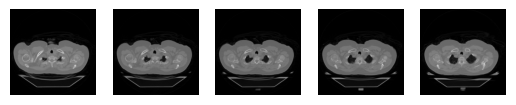

In [17]:
# Plot the images on a subplots array
fig, axes = plt.subplots(nrows=1, ncols=n0)

# Loop through subplots and draw image
for ii in range(n0):
      im = vol[ii, :, :]
      axes[ii].imshow(im, cmap='gray')
      axes[ii].axis('off')
# Render the figure
plt.show()

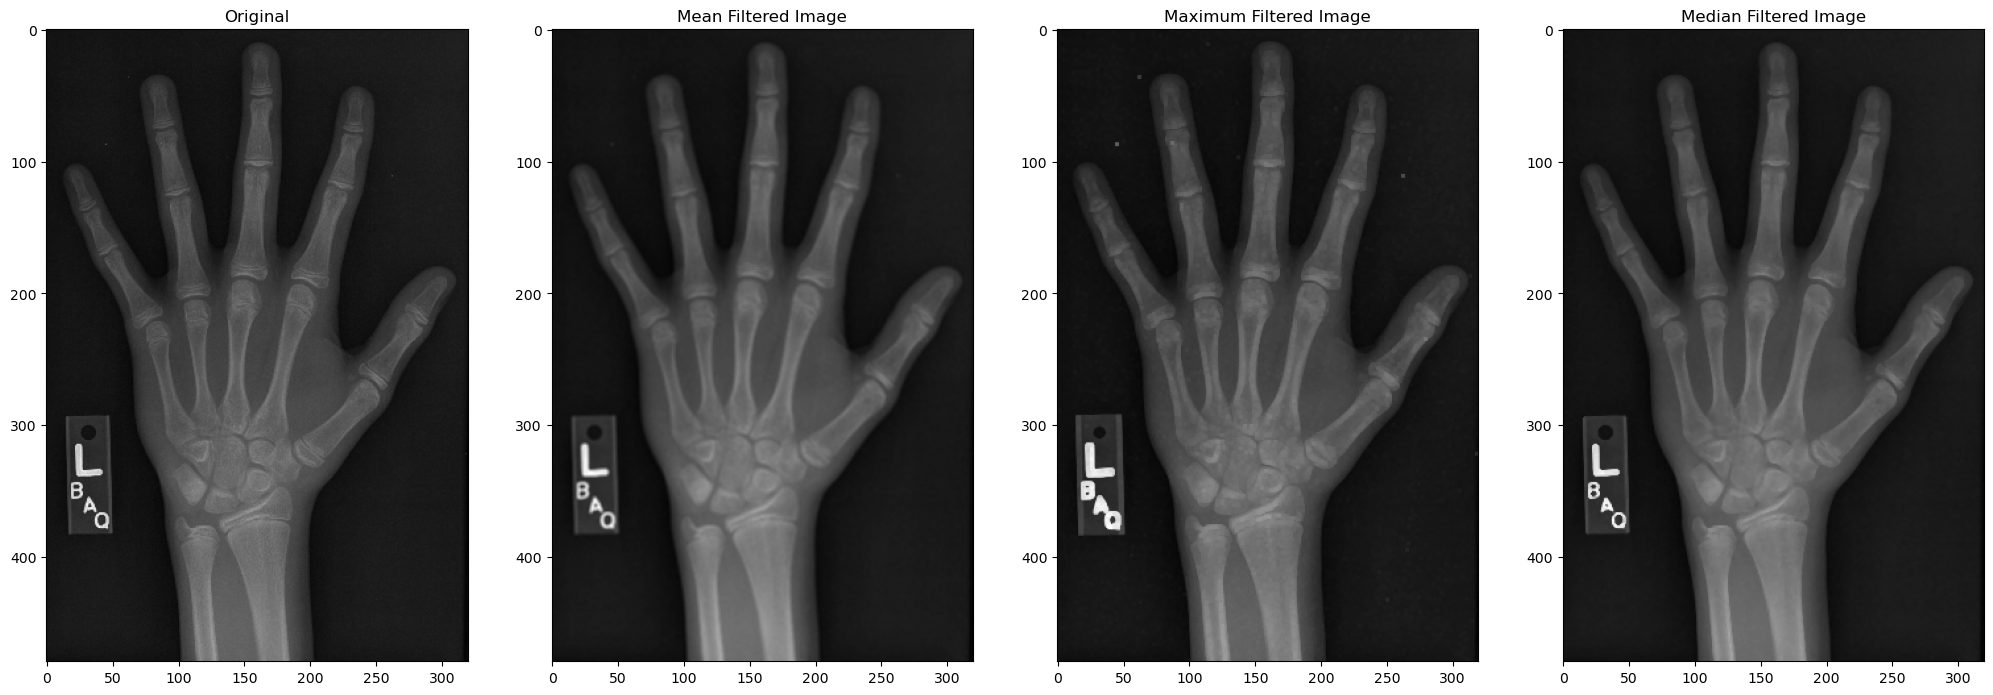

In [20]:
from scipy import ndimage as ndi

im = io.imread('datasets/signal_and_image_analysis/hand_radiograph.png')

# Set filter weights
weights = [[0.11, 0.11, 0.11],
[0.11, 0.11, 0.11],
[0.11, 0.11, 0.11]]

# Convolve the image with the filter
im_filt = ndi.convolve(im, weights)
im_max_filter = ndi.maximum_filter(im, size=3)
im_med_filter = ndi.median_filter(im, size=3)
# Plot the images
fig, axes = plt.subplots(1,4, figsize=(25,10))
axes[0].imshow(im, cmap='gray')
axes[0].set_title("Original")
axes[1].imshow(im_filt, cmap='gray')
axes[1].set_title("Mean Filtered Image")
axes[2].imshow(im_max_filter, cmap='gray')
axes[2].set_title("Maximum Filtered Image")
axes[3].imshow(im_med_filter, cmap='gray')
axes[3].set_title("Median Filtered Image")
plt.show()

In [22]:
import imageio.v2 as imageio
import numpy as np

im = imageio.imread('datasets\signal_and_image_analysis/sunnybrook-cardiac-mr/SCD2001_006/SCD2001_MR_117.dcm')
# Smooth intensity values
im_filt = ndi.median_filter(im, size=3)

# Select high-intensity pixels
mask_start = np.where(im_filt > 60 , 1, 0)
mask = ndi.binary_closing(mask_start)

# Label the objects in "mask"
labels, nlabels = ndi.label(mask)
print('Num. Labels:', nlabels)

Num. Labels: 26


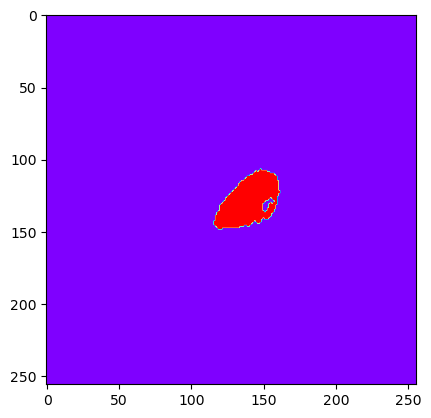

In [23]:
# Label the image "mask"
labels, nlabels = ndi.label(mask)
# Select left ventricle pixels
lv_val = labels[128, 128]
lv_mask = np.where(labels== lv_val, 1, 0)

# Overlay selected label
plt.imshow(lv_mask, cmap='rainbow')
plt.show()

Reading DICOM (examining files): 1/254 files (0.4254/254 files (100.0%)
  Found 3 correct series.


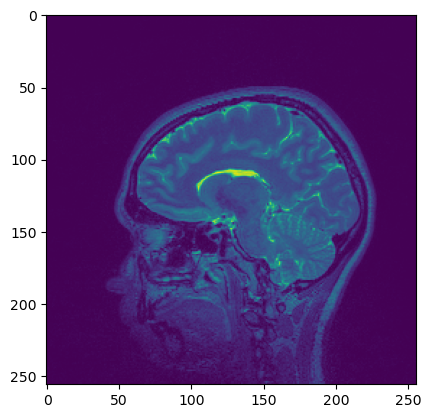

In [24]:

im = imageio.volread('datasets/signal_and_image_analysis/MR_head.dcm')
plt.imshow(im)

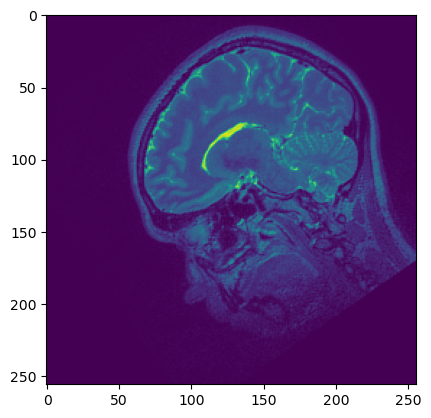

In [25]:
# Center and level image
xfm = ndi.shift(im, shift=(-20,20))
xfm = ndi.rotate(xfm, angle=35, reshape=False)
plt.imshow(xfm)

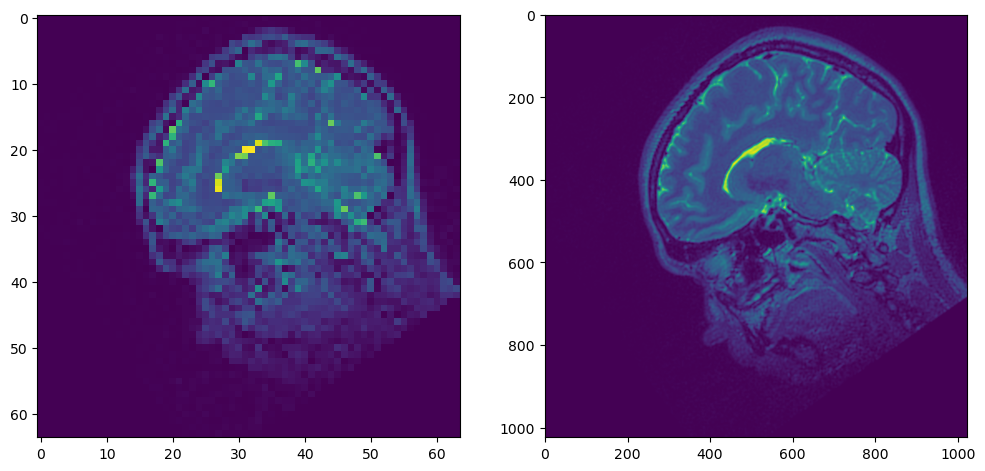

In [26]:
# Resample image
im_dn = ndi.zoom(xfm, zoom=0.25)
im_up = ndi.zoom(xfm, zoom=4)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(im_dn)
axes[1].imshow(im_up)
plt.show()

order 0 shape: (1024, 1024) ; order 5 shape:  (1024, 1024)


Text(0.5, 1.0, 'order 5')

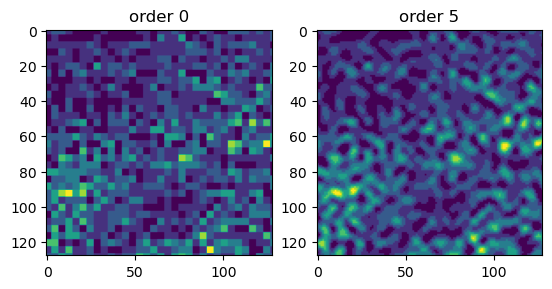

In [27]:
# Upsample "im" by a factor of 512/128
up0 = ndi.zoom(im, zoom=512/128, order=0)
up5 = ndi.zoom(im, zoom=512/128, order=5)
print('order 0 shape:', up0.shape, '; order 5 shape: ', up5.shape)
fig, axes = plt.subplots(1,2)

axes[0].imshow(up0[128:256, 128:256])
axes[0].set_title('order 0')
axes[1].imshow(up5[128:256, 128:256])
axes[1].set_title('order 5')